Importing Libaries

In [51]:
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10,6
plt.xkcd()
%matplotlib inline

In [52]:
df = pd.read_csv(r"C:\Users\Monikesh Kakoty\Documents\Untitled Folder\zomato\zomato_restaurants_in_India.csv")

In [53]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


extracting data for Guwahati

In [54]:
df=df.loc[df['city'] == 'Guwahati']

In [55]:
#Filtering the data with deleting not required column
df.isna().sum()


res_id                     0
name                       0
establishment              0
url                        0
address                    0
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
zipcode                 1881
country_id                 0
locality_verbose           0
cuisines                   0
timings                   12
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support          0
delivery                   0
takeaway                   0
dtype: int64

In [56]:
df=df.drop(['city_id','address', 'country_id','currency','zipcode','locality_verbose','res_id','url','delivery','highlights','takeaway','opentable_support','price_range'], axis = 1)


In [57]:
df.head()

,name,establishment,city,locality,latitude,longitude,cuisines,timings,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count
70518,KFC,['Quick Bites'],Guwahati,Christian Basti,26.154169,91.780645,"Burger, Fast Food",11 AM to 11 PM,450,4.2,Very Good,709,180
70519,John's Kitchen,['Quick Bites'],Guwahati,Christian Basti,26.159681,91.773681,"Chinese, Seafood",1:30 PM to 10 PM (Mon-Sun),350,4.6,Excellent,966,184
70520,Barbeque Nation,['Fine Dining'],Guwahati,Ulubari,26.172262,91.759729,"North Indian, Mediterranean","12 Noon to 3 PM, 6:30 PM to 11:30 PM",1600,4.9,Excellent,1914,1978
70521,Piazza,['Casual Dining'],Guwahati,Ulubari,26.179929,91.756321,"Italian, Continental, Asian, Modern Indian, Pizza",11am – 11pm (Mon-Sun),800,4.4,Very Good,489,618
70522,Terra Mayaa Restaurant and Lounge,['Fine Dining'],Guwahati,"Anil Plaza, Christian Basti",26.160651,91.773809,"Continental, Italian, Indian, Asian",12 Noon to 11:45 PM,1400,4.1,Very Good,877,612


In [58]:
# rename non descriptive columns

df.rename(columns={'average_cost_for_two': 'average_cost', 'establishment': 'rest_type'}, inplace=True)

In [59]:
df.dropna()

,name,rest_type,city,locality,latitude,longitude,cuisines,timings,average_cost,aggregate_rating,rating_text,votes,photo_count
70518,KFC,['Quick Bites'],Guwahati,Christian Basti,26.154169,91.780645,"Burger, Fast Food",11 AM to 11 PM,450,4.2,Very Good,709,180
70519,John's Kitchen,['Quick Bites'],Guwahati,Christian Basti,26.159681,91.773681,"Chinese, Seafood",1:30 PM to 10 PM (Mon-Sun),350,4.6,Excellent,966,184
70520,Barbeque Nation,['Fine Dining'],Guwahati,Ulubari,26.172262,91.759729,"North Indian, Mediterranean","12 Noon to 3 PM, 6:30 PM to 11:30 PM",1600,4.9,Excellent,1914,1978
70521,Piazza,['Casual Dining'],Guwahati,Ulubari,26.179929,91.756321,"Italian, Continental, Asian, Modern Indian, Pizza",11am – 11pm (Mon-Sun),800,4.4,Very Good,489,618
70522,Terra Mayaa Restaurant and Lounge,['Fine Dining'],Guwahati,"Anil Plaza, Christian Basti",26.160651,91.773809,"Continental, Italian, Indian, Asian",12 Noon to 11:45 PM,1400,4.1,Very Good,877,612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73135,Silk Route,['Casual Dining'],Guwahati,Uzan Bazaar,26.187686,91.755158,"Chinese, Thai, Momos",12 Noon to 9 PM (Mon-Sun),450,4.1,Very Good,163,242
73136,Recipes,['Casual Dining'],Guwahati,Dispur,26.139583,91.798168,"Chinese, North Indian, Mughlai",11 AM to 11 PM,1100,3.9,Good,171,110
73137,Santa Fantasea,['Casual Dining'],Guwahati,Zoo Tiniali,26.171197,91.777699,Seafood,12noon – 10pm (Mon-Sun),1000,4.0,Very Good,105,108
73138,16 Hillside,['Casual Dining'],Guwahati,Zoo Tiniali,26.173661,91.785975,"Indian, Chinese, Momos",12Noon to 10PM (Mon-Sun),700,3.8,Good,109,162


In [60]:
#removing the duplicate value
df=df.drop_duplicates()
df.shape

(727, 13)

In [61]:
df['rest_type'] =  df['rest_type'].apply(lambda x: x.replace('[','').replace(']','')) 
df['rest_type']= df['rest_type'].str.replace(r"[\"\',]", '')
df.head()

C:\Users\Monikesh Kakoty\AppData\Local\Temp\ipykernel_23224\347796180.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['rest_type']= df['rest_type'].str.replace(r"[\"\',]", '')


,name,rest_type,city,locality,latitude,longitude,cuisines,timings,average_cost,aggregate_rating,rating_text,votes,photo_count
70518,KFC,Quick Bites,Guwahati,Christian Basti,26.154169,91.780645,"Burger, Fast Food",11 AM to 11 PM,450,4.2,Very Good,709,180
70519,John's Kitchen,Quick Bites,Guwahati,Christian Basti,26.159681,91.773681,"Chinese, Seafood",1:30 PM to 10 PM (Mon-Sun),350,4.6,Excellent,966,184
70520,Barbeque Nation,Fine Dining,Guwahati,Ulubari,26.172262,91.759729,"North Indian, Mediterranean","12 Noon to 3 PM, 6:30 PM to 11:30 PM",1600,4.9,Excellent,1914,1978
70521,Piazza,Casual Dining,Guwahati,Ulubari,26.179929,91.756321,"Italian, Continental, Asian, Modern Indian, Pizza",11am – 11pm (Mon-Sun),800,4.4,Very Good,489,618
70522,Terra Mayaa Restaurant and Lounge,Fine Dining,Guwahati,"Anil Plaza, Christian Basti",26.160651,91.773809,"Continental, Italian, Indian, Asian",12 Noon to 11:45 PM,1400,4.1,Very Good,877,612


In [62]:
# check for unique values in the aggregate_rating column
df.aggregate_rating.unique()

array([4.2, 4.6, 4.9, 4.4, 4.1, 4.7, 4.3, 4.5, 4.8, 3.8, 3.6, 3.9, 4. ,
       3.7, 3.4, 3.5, 3. , 2.7, 0. , 2.9, 3.3, 2.8, 3.1, 3.2, 2.2, 2.3,
       2.4, 2.5, 2.6])

In [63]:
# fix the name column
df.name = df.name.apply(lambda x: x.title())

In [64]:
df.head(100)

,name,rest_type,city,locality,latitude,longitude,cuisines,timings,average_cost,aggregate_rating,rating_text,votes,photo_count
70518,Kfc,Quick Bites,Guwahati,Christian Basti,26.154169,91.780645,"Burger, Fast Food",11 AM to 11 PM,450,4.2,Very Good,709,180
70519,John'S Kitchen,Quick Bites,Guwahati,Christian Basti,26.159681,91.773681,"Chinese, Seafood",1:30 PM to 10 PM (Mon-Sun),350,4.6,Excellent,966,184
70520,Barbeque Nation,Fine Dining,Guwahati,Ulubari,26.172262,91.759729,"North Indian, Mediterranean","12 Noon to 3 PM, 6:30 PM to 11:30 PM",1600,4.9,Excellent,1914,1978
70521,Piazza,Casual Dining,Guwahati,Ulubari,26.179929,91.756321,"Italian, Continental, Asian, Modern Indian, Pizza",11am – 11pm (Mon-Sun),800,4.4,Very Good,489,618
70522,Terra Mayaa Restaurant And Lounge,Fine Dining,Guwahati,"Anil Plaza, Christian Basti",26.160651,91.773809,"Continental, Italian, Indian, Asian",12 Noon to 11:45 PM,1400,4.1,Very Good,877,612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70613,Cups & Cues Sports Cafe,Café,Guwahati,Six Mile,26.136911,91.811354,"Cafe, North Indian, Chinese, Continental",11 AM to 10 PM,600,4.0,Very Good,224,279
70614,Patisserie Operaa,Bakery,Guwahati,Ulubari,26.172957,91.760221,"Bakery, Fast Food",10 AM to 10 PM (Mon-Sun),350,4.1,Very Good,347,417
70615,Café B-You - Hotel Radisson Blu,Café,Guwahati,"Hotel Radisson Blu, Guwahati",26.141709,91.673693,"Cafe, Chinese, Assamese, Continental, Thai, So...","6:30 AM to 10:30 AM, 12:30 PM to 3 PM, 7 PM to...",2000,4.0,Very Good,242,445
70616,Nehars - The Mughlai Darbar,Casual Dining,Guwahati,Bhangagarh,26.159541,91.775341,"Mughlai, North Indian",12 Noon to 10:45 PM,500,4.0,Very Good,322,288


In [65]:
# check for values
df.average_cost.unique()

array([ 450,  350, 1600,  800, 1400,  500,    0, 1300,  900, 1200,  600,
        550,  400,  300, 1000,  700, 1650,  100,  250,  200,  750, 1500,
       1100, 2000, 4000, 2500, 2400, 1800, 1700,  950,   80,  150,  650,
        850], dtype=int64)

In [66]:
df=df.loc[df['average_cost'] != 0]

In [67]:
df.average_cost.unique()

array([ 450,  350, 1600,  800, 1400,  500, 1300,  900, 1200,  600,  550,
        400,  300, 1000,  700, 1650,  100,  250,  200,  750, 1500, 1100,
       2000, 4000, 2500, 2400, 1800, 1700,  950,   80,  150,  650,  850],
      dtype=int64)

In [68]:
bins = [0,200, 500, 1000, 3000, 6000]
labels = ['very cheap','cheap','moderate','expensive','very expensive']
df['cost_range']= pd.cut(df.average_cost, bins=bins,labels=labels)

In [69]:
df.loc[:,['average_cost','cost_range']]

,average_cost,cost_range
70518,450,cheap
70519,350,cheap
70520,1600,expensive
70521,800,moderate
70522,1400,expensive
...,...,...
72834,350,cheap
72848,300,cheap
73037,400,cheap
73038,600,moderate


In [70]:
df.aggregate_rating.unique()

array([4.2, 4.6, 4.9, 4.4, 4.1, 4.7, 4.3, 4.5, 4.8, 3.8, 3.6, 3.9, 4. ,
       3.7, 3.4, 3.5, 3. , 2.7, 0. , 2.9, 3.3, 2.8, 3.1, 3.2, 2.2, 2.3,
       2.4, 2.5, 2.6])

In [71]:
bins =[0,2,3,4,5]
labels =['low','moderate','high','exceptional']
df['rate_range'] = pd.cut(df.aggregate_rating, bins=bins,labels=labels)

In [72]:
df.loc[:,['aggregate_rating','rate_range']]

,aggregate_rating,rate_range
70518,4.2,exceptional
70519,4.6,exceptional
70520,4.9,exceptional
70521,4.4,exceptional
70522,4.1,exceptional
...,...,...
72834,3.6,high
72848,3.6,high
73037,3.6,high
73038,3.6,high


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 70518 to 73039
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              715 non-null    object  
 1   rest_type         715 non-null    object  
 2   city              715 non-null    object  
 3   locality          715 non-null    object  
 4   latitude          715 non-null    float64 
 5   longitude         715 non-null    float64 
 6   cuisines          715 non-null    object  
 7   timings           708 non-null    object  
 8   average_cost      715 non-null    int64   
 9   aggregate_rating  715 non-null    float64 
 10  rating_text       715 non-null    object  
 11  votes             715 non-null    int64   
 12  photo_count       715 non-null    int64   
 13  cost_range        715 non-null    category
 14  rate_range        631 non-null    category
dtypes: category(2), float64(3), int64(3), object(7)
memory usage: 80.0+ 

## **Correlation**

<AxesSubplot:>

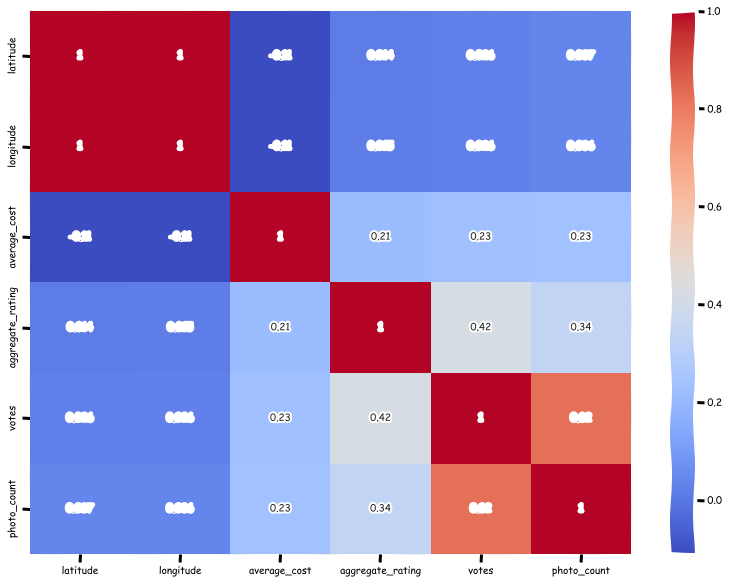

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [75]:
# set a function to count the values in a comma separated string 
def clear_text_2pd(x):
    'extract the data and count it from comma separted string values in column x returns a pd.Series ready to plot'
    return pd.Series([e.strip() for i in df[df[x].notnull()][x] for e in i.split(',') if e!='[]' if i ])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Quick Bites'),
  Text(1, 0, 'Casual Dining'),
  Text(2, 0, 'Café'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Dessert Parlour'),
  Text(5, 0, 'Sweet Shop'),
  Text(6, 0, 'Bar'),
  Text(7, 0, 'Food Court'),
  Text(8, 0, 'Beverage Shop'),
  Text(9, 0, 'Fine Dining')])

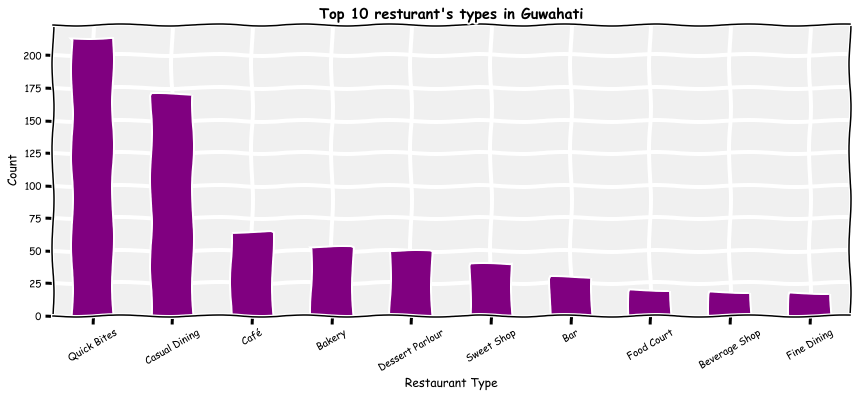

In [76]:
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6

# top 10 restaurants types
clear_text_2pd('rest_type').value_counts()[:10].plot(kind='bar',color='purple',grid=True)
plt.title('Top 10 resturant\'s types in Guwahati', weight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Count');
plt.tight_layout();
plt.xticks(rotation=30)

- **Quick Bites** is the most common restaurant type in Guwahati, followed by **Casual Dining**.

Business wise, one should be careful before going into **Quick Bites** restaurants as more than 200 restaurants serve in this category !

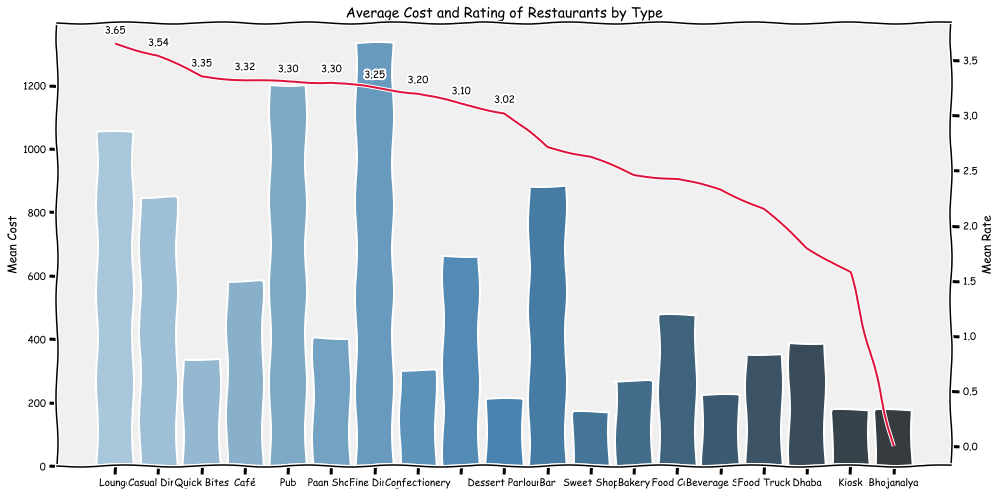

In [77]:
rest_params = df.groupby(by='rest_type', as_index=False).mean().sort_values(by='aggregate_rating',ascending=False)
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x='rest_type', y='average_cost', data=rest_params, ax=ax, palette='Blues_d')
ax2 = ax.twinx()
sns.lineplot(x='rest_type', y='aggregate_rating', data=rest_params, ax=ax2, color='crimson', sort=False)
ax.tick_params(axis='x', labelrotation=0)

ax.xaxis.set_label_text("")

xs = np.arange(0,10,1)
ys = rest_params['aggregate_rating']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Average Cost and Rating of Restaurants by Type', size=14)
ax.set_ylabel('Mean Cost')
ax2.set_ylabel('Mean Rate')
plt.tight_layout()

In [78]:
df['cuisines'].value_counts()

North Indian, Chinese                 49
North Indian                          27
Finger Food                           24
Mithai                                20
Desserts                              20
                                      ..
Fast Food, Tibetan, Momos              1
Chinese, Biryani, Desserts             1
Fast Food, Bakery, Desserts, Momos     1
Chinese, Fast Food, Rolls              1
South Indian, Assamese                 1
Name: cuisines, Length: 285, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'Fast Food'),
  Text(3, 0, 'Desserts'),
  Text(4, 0, 'Bakery'),
  Text(5, 0, 'Continental'),
  Text(6, 0, 'Cafe'),
  Text(7, 0, 'Momos'),
  Text(8, 0, 'Mithai'),
  Text(9, 0, 'Beverages'),
  Text(10, 0, 'South Indian'),
  Text(11, 0, 'Assamese'),
  Text(12, 0, 'Street Food'),
  Text(13, 0, 'Finger Food'),
  Text(14, 0, 'Biryani'),
  Text(15, 0, 'Italian'),
  Text(16, 0, 'Ice Cream'),
  Text(17, 0, 'Rolls'),
  Text(18, 0, 'Pizza'),
  Text(19, 0, 'Sandwich')])

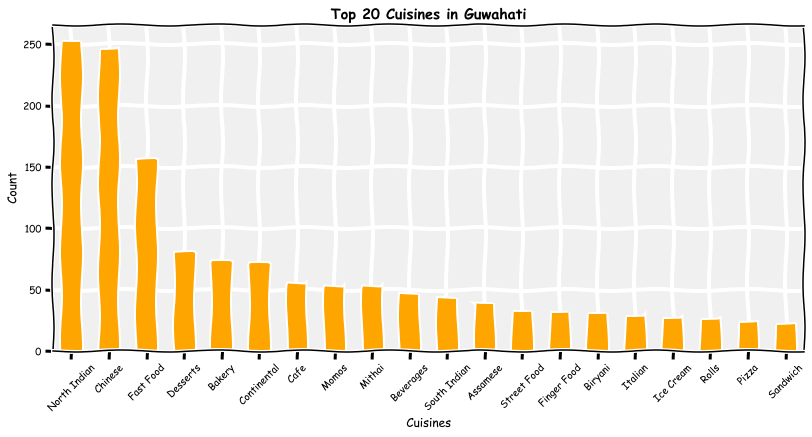

In [79]:
clear_text_2pd('cuisines').value_counts()[:20].plot(kind='bar',color='orange',grid=True)
plt.title('Top 20 Cuisines in Guwahati', weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45)

- As we can notice from the above chart that **North indian** is at the top of cuisines provided in Guwahati, followed by **Fast Food** and **Chinese**.

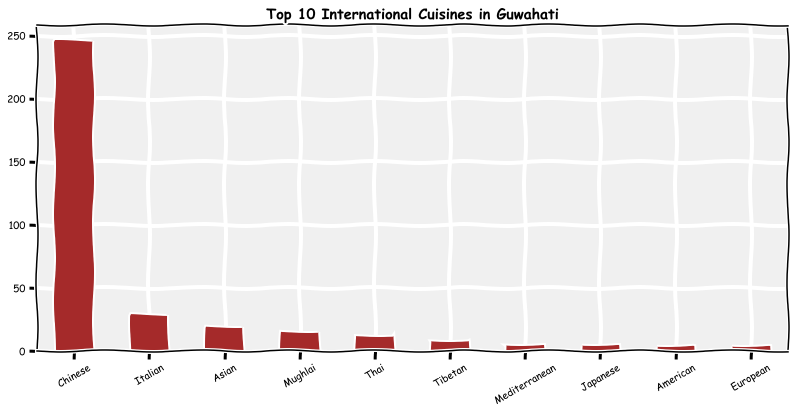

In [80]:
plt.rcParams['figure.figsize'] = 12,6

intern_cusine = []
for i in clear_text_2pd('cuisines'):
    #print('Indian' in i.split())
    if 'Indian' not in i.split() and 'Mithai' not in i.split() and 'Paan' not in i.split() and 'Assamese' not in i.split():
        if i[-2:] == 'an' or i[-2:] == 'se' or i[-2:] == 'ai':
            intern_cusine.append(i)
pd.Series(intern_cusine).value_counts()[:10].plot(kind='bar',color= 'brown', grid=True)
plt.title('Top 10 International Cuisines in Guwahati',weight='bold');
plt.xticks(rotation=30)
del intern_cusine

> - **Chinese** at the top, followed by **Italian** then **Asian**.
> - We can see different cultures from all over the world like Asian, Japanese, Mughlai , American, Mediterranean and European
> - Highly diversified market

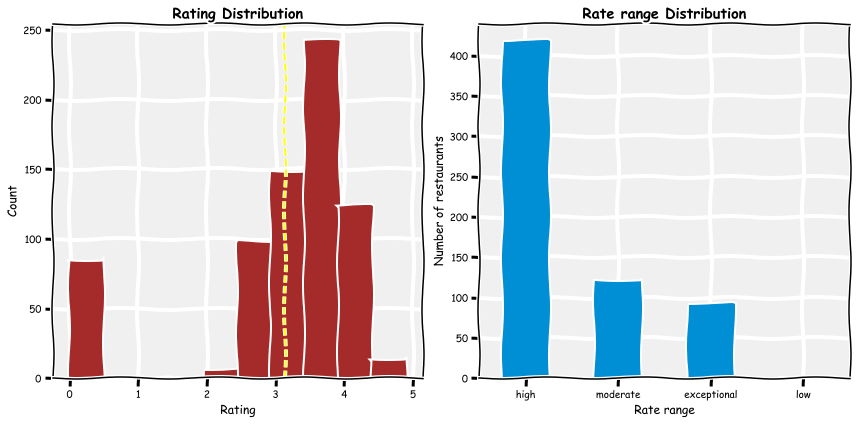

In [81]:
# histogram for restaurants average_rate
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
df.aggregate_rating.hist(color='brown')
plt.axvline(x= df.aggregate_rating.mean(),ls='--',color='yellow')
plt.title('Rating Distribution',weight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2)
df.rate_range.value_counts().plot(kind='bar',grid=True)
plt.title('Rate range Distribution',weight='bold')
plt.xlabel('Rate range')
plt.ylabel('Number of restaurants')
plt.xticks(rotation=0)
plt.tight_layout();

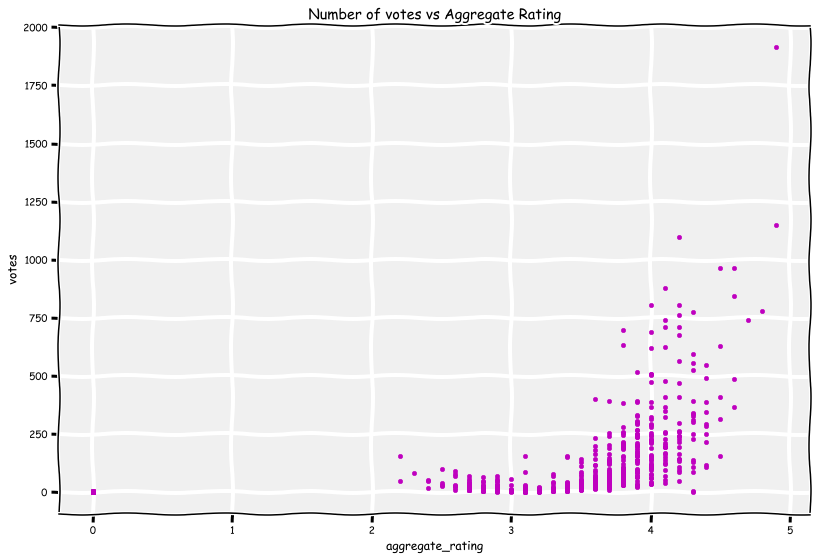

In [82]:
# votes vs rate
plt.rcParams['figure.figsize'] = 12,9
df.plot(kind='scatter',x='aggregate_rating',y='votes',marker='o',color='m',grid=True)
plt.title('Number of votes vs Aggregate Rating');

**Aggregate_rating** between **3.5** and **4.5** has highest number of **votes**.

### Probablity distribution of average_cost

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probablity distribution of average_cost')

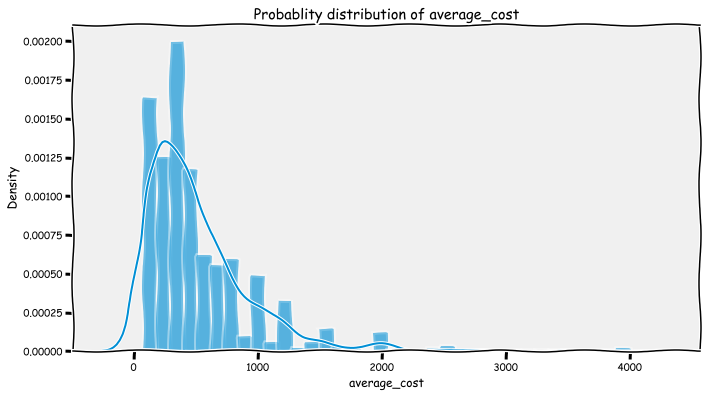

In [83]:
plt.figure(figsize=(10,6))
sns.distplot(df['average_cost'])
plt.title('Probablity distribution of average_cost')

Most of the restaurants are in the **average_cost** range of **100** to **1000**.

Text(0, 0.5, 'Mean Rating')

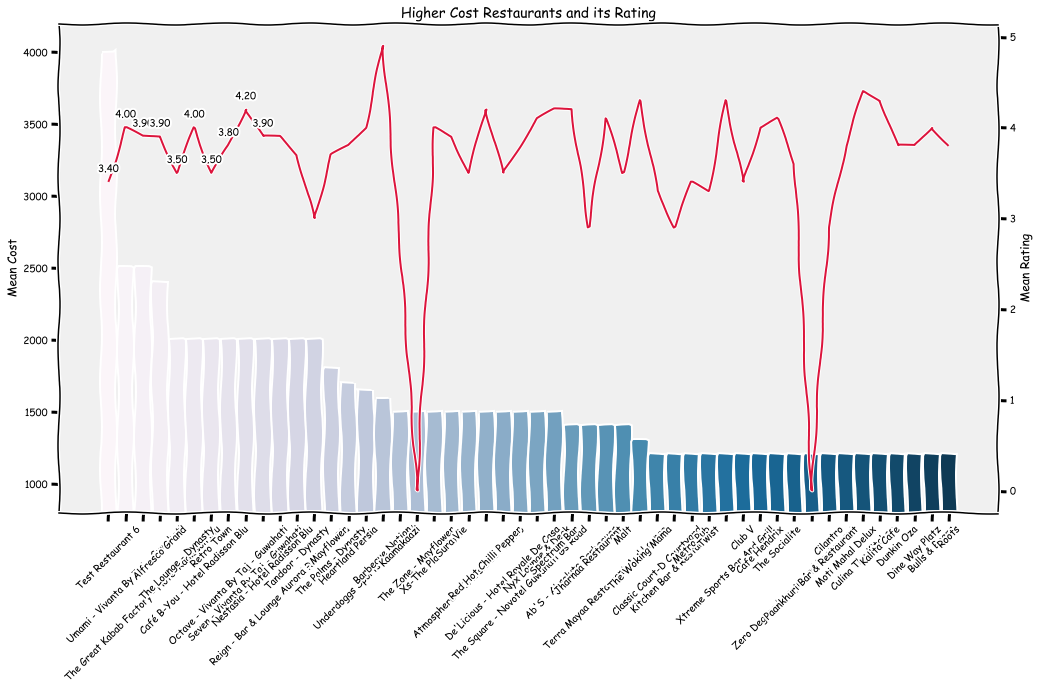

In [84]:
high_cost = df.sort_values(by='average_cost',ascending=False).iloc[:50, np.r_[0, 8, 9]].drop_duplicates()
fig, ax = plt.subplots(figsize=(15, 9))
df
sns.barplot(x='name', y='average_cost', data=high_cost, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='name', y='aggregate_rating', data=high_cost, ax=ax2, color='crimson', sort=False)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim(800,)
ax.xaxis.set_label_text("")

xs = np.arange(0,10,1)
ys = high_cost['aggregate_rating']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Higher Cost Restaurants and its Rating', size=14)
ax.set_ylabel('Mean Cost')
ax2.set_ylabel('Mean Rating')
#plt.tight_layout()

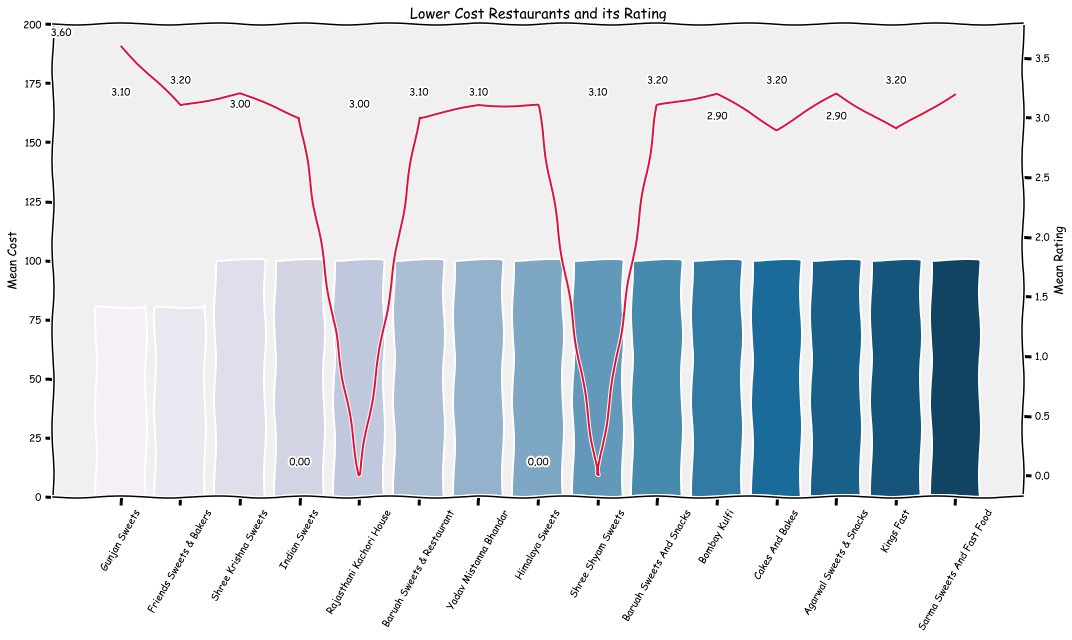

In [85]:
low_cost = df.sort_values(by='average_cost', ascending=True).iloc[:15, np.r_[0, 8, 9]].drop_duplicates()
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='name', y='average_cost', data=low_cost, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='name', y='aggregate_rating', data=low_cost, ax=ax2, color='crimson', sort=False)
ax.tick_params(axis='x', labelrotation=60)
ax.set_ylim([0,200])

ax.xaxis.set_label_text("")

xs = np.arange(0,15,1)
ys = low_cost['aggregate_rating']

for x,y in zip(xs-1,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Lower Cost Restaurants and its Rating')
ax.set_ylabel('Mean Cost')
ax2.set_ylabel('Mean Rating')
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Zoo Tiniali'),
  Text(1, 0, 'Uzan Bazaar'),
  Text(2, 0, 'Christian Basti'),
  Text(3, 0, 'Beltola'),
  Text(4, 0, 'Ulubari'),
  Text(5, 0, 'Bhangagarh'),
  Text(6, 0, 'Chandmari'),
  Text(7, 0, 'Six Mile'),
  Text(8, 0, 'Paltan Bazaar'),
  Text(9, 0, 'Ganeshguri')])

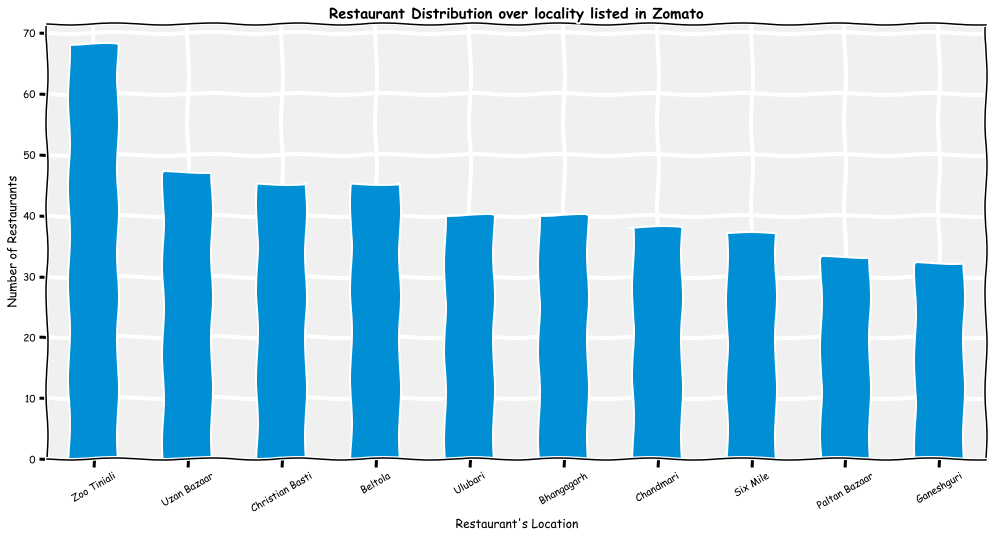

In [86]:
# location
plt.rcParams['figure.figsize'] = 15,8;
df.locality.value_counts()[:10].plot(kind='bar', grid=True)
plt.title('Restaurant Distribution over locality listed in Zomato',weight='bold')
plt.xlabel('Restaurant\'s Location')
plt.ylabel('Number of Restaurants');
plt.xticks(rotation=30)

## Aggregate Rating per Locality

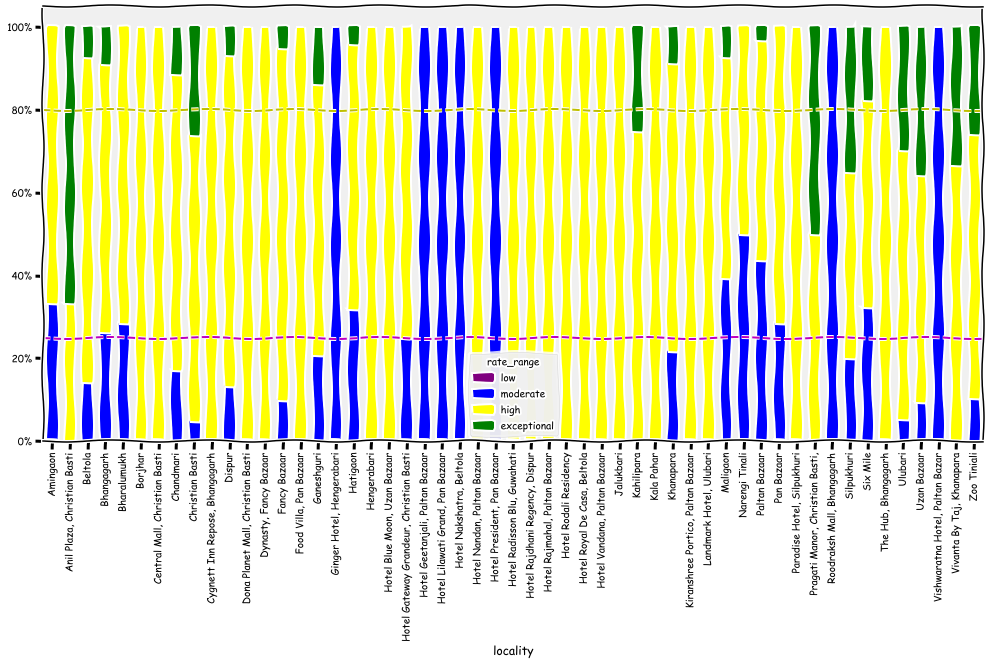

In [87]:
plt.rcParams['figure.figsize'] = 15,8;
df.groupby(['locality','rate_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['purple','blue','yellow','green','brown'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y =80 ,ls='--',color='y')
plt.axhline(y =25 ,ls='--',color='m');

### Cusine trend per Locality

In [88]:
loc_cuisine = df.groupby('locality')['cuisines'].value_counts().sort_values(ascending=False)
ind = loc_cuisine.index.levels[0]
top_cuisine , rest_count =[],[]
for i in ind:
    top_cuisine.append(loc_cuisine[i].index[0])
    rest_count.append(loc_cuisine[i][0])

In [89]:
# location's top cuisine
pd.DataFrame({'locality':ind,'top_cuisine':top_cuisine,'rest_count':rest_count})


,locality,top_cuisine,rest_count
0,Amingaon,"Biryani, North Indian",2
1,"Anil Plaza, Christian Basti","Continental, Italian, Indian, Asian",1
2,Beltola,"North Indian, Chinese",3
3,Bhangagarh,North Indian,4
4,Bharalumukh,Mithai,2
5,Borjhar,"Sandwich, North Indian, Chinese, Burger, Assamese",1
6,"Central Mall, Christian Basti",South Indian,1
7,Chandmari,Mishti,3
8,Christian Basti,"North Indian, Chinese",3
9,"Cygnett Inn Repose, Bhangagarh",Cafe,1


### Restaurant  Types popular in Guwahati

<AxesSubplot:ylabel='rest_type'>

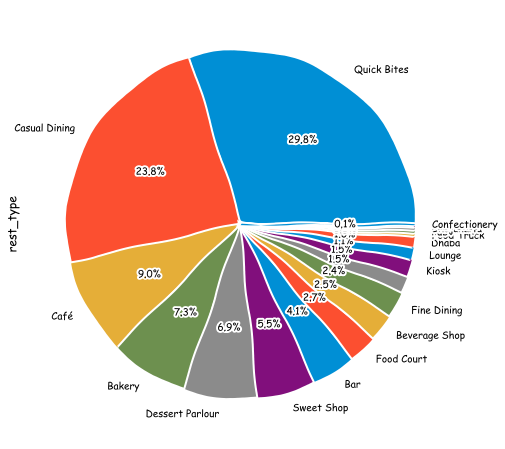

In [90]:
df.rest_type.value_counts().plot(kind = "pie", autopct='%.1f%%')

### What is the relation between cost and neighbouhood?

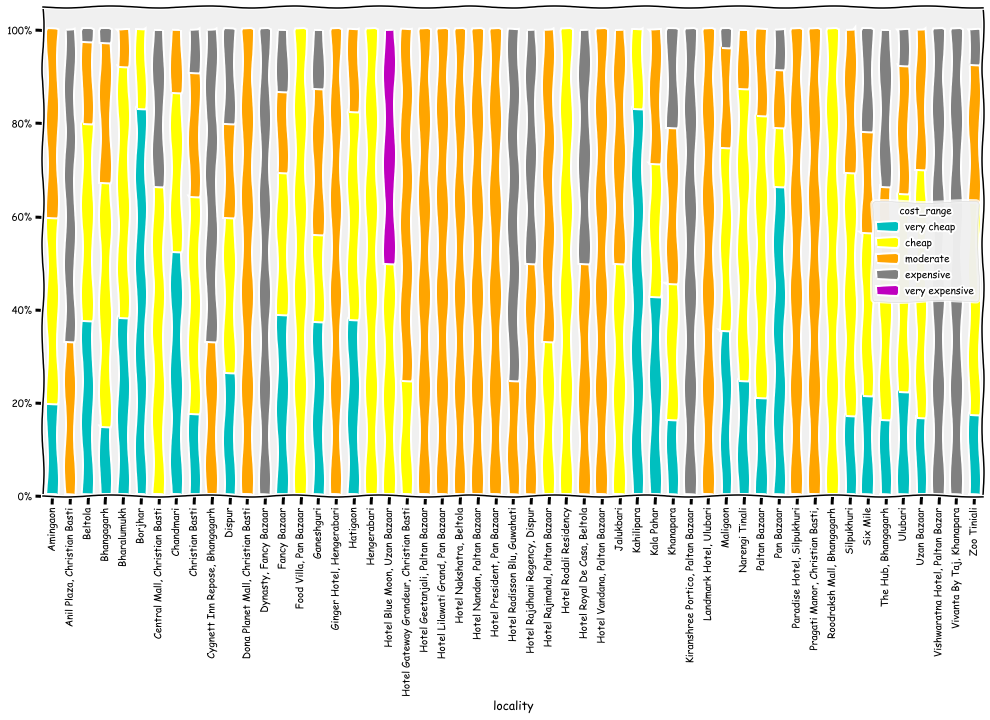

In [91]:
# location versus cost_range
plt.rcParams['figure.figsize'] = 15,9;
df.groupby(['locality','cost_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','yellow','orange','grey','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

## Best rated, most voted restaurants, irrespective of cost

This will be as:
- has the high aggregate_rating , > 4.5
- has the high number of votes as it will more reliable

In [92]:
df.query('aggregate_rating > 4.5')[['name','votes','aggregate_rating','average_cost','rest_type','locality']][:10].\
sort_values(by=['aggregate_rating','votes'],ascending=[False,False]).drop_duplicates()

,name,votes,aggregate_rating,average_cost,rest_type,locality
70520,Barbeque Nation,1914,4.9,1600,Fine Dining,Ulubari
70523,Mocha,1148,4.9,800,Café,"Anil Plaza, Christian Basti"
70532,Raja Mircha,779,4.8,400,Quick Bites,Dispur
70524,Brewbakes,741,4.7,500,Café,Six Mile
70519,John'S Kitchen,966,4.6,350,Quick Bites,Christian Basti
70547,Fat Belly,844,4.6,500,Quick Bites,Uzan Bazaar
70528,Kalita Spectrum,486,4.6,1200,Casual Dining,Six Mile
70539,Mising Kitchen,367,4.6,700,Casual Dining,Ganeshguri


##  Best restaurants in Guwahati ?

To answer this question let's first define the best restaurant:
This will be as:
- has the high rate , above average,
- has the high number of votes as it will more reliable
- has the low cost

In [93]:
# get the average votes & rate
avg_cost = df.average_cost.mean()
avg_rate = df.aggregate_rating.mean()

rel_data = df.query('aggregate_rating >=@avg_rate & average_cost <= @avg_cost').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
# the best list
rel_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']][:10].drop_duplicates()

,name,aggregate_rating,votes,cuisines,average_cost,locality
70532,Raja Mircha,4.8,779,"Assamese, Naga",400,Dispur
70524,Brewbakes,4.7,741,"Cafe, Continental, Chinese",500,Six Mile
70519,John'S Kitchen,4.6,966,"Chinese, Seafood",350,Christian Basti
70547,Fat Belly,4.6,844,"Asian, Chinese, Tibetan, Momos",500,Uzan Bazaar
70828,Maa Manasha Hotel,4.5,407,Bengali,500,Maligaon
70561,Fat Belly,4.4,389,"Chinese, Thai, Momos",500,Chandmari
70838,Loyans,4.4,343,"Bakery, Fast Food",200,Uzan Bazaar
70582,Fat Belly,4.4,292,"Asian, Chinese, Tibetan, Momos",500,Uzan Bazaar
70569,Taii Singpho,4.4,252,North Eastern,500,Silpukhuri
70786,Juicy Hut,4.4,117,Juices,150,Zoo Tiniali


**Raja Mircha** and **Brewbakes** are the best **overall** restaurant in Guwahati !!

### Where can one find the best restaurants in Guwahati?

Text(0, 0.5, 'count')

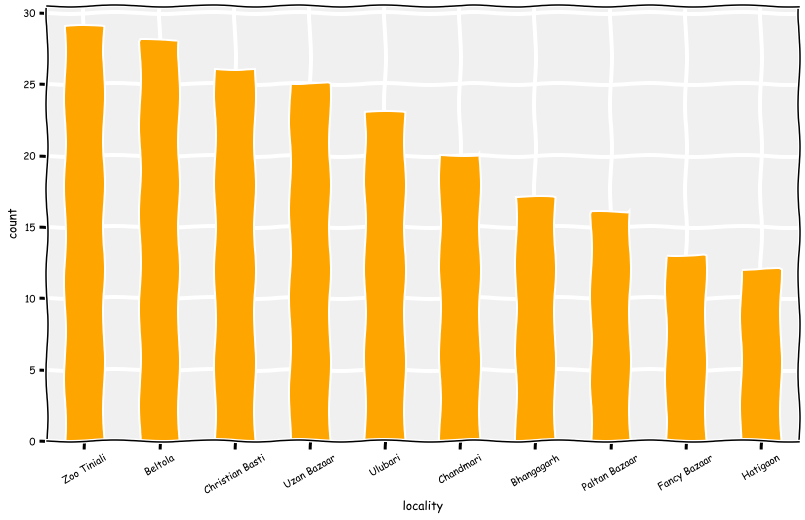

In [94]:
#rel_data.groupby('location')[['rate','votes','rest_type','average_cost']].value_counts()
plt.rcParams['figure.figsize'] = 12,8
rel_data['locality'].value_counts()[:10].sort_values(ascending=False).plot(kind='bar',color ='orange', grid=True);
plt.xticks(rotation=30)
plt.xlabel('locality')
plt.ylabel('count')

**Zoo Tiniali** is again at the top of the list, followed by **Christian Basti** and **New Uzab Bazar**

In [95]:
### Average cost at this overall best restaurants?

In [96]:
# average_price from the most reliable data
rel_data['average_cost'].mean()

311.3651877133106

## Top 10 restaurant chain in Guwahati

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Domino'S Pizza"),
  Text(1, 0, 'Baskin Robbins'),
  Text(2, 0, 'Loyans'),
  Text(3, 0, "Repose - Baker'S Special"),
  Text(4, 0, 'Fat Belly'),
  Text(5, 0, 'Prime Bakes'),
  Text(6, 0, 'Brown Creams'),
  Text(7, 0, 'Kfc'),
  Text(8, 0, 'Grill Republica'),
  Text(9, 0, '11Th Avenue Cafe Bistro')])

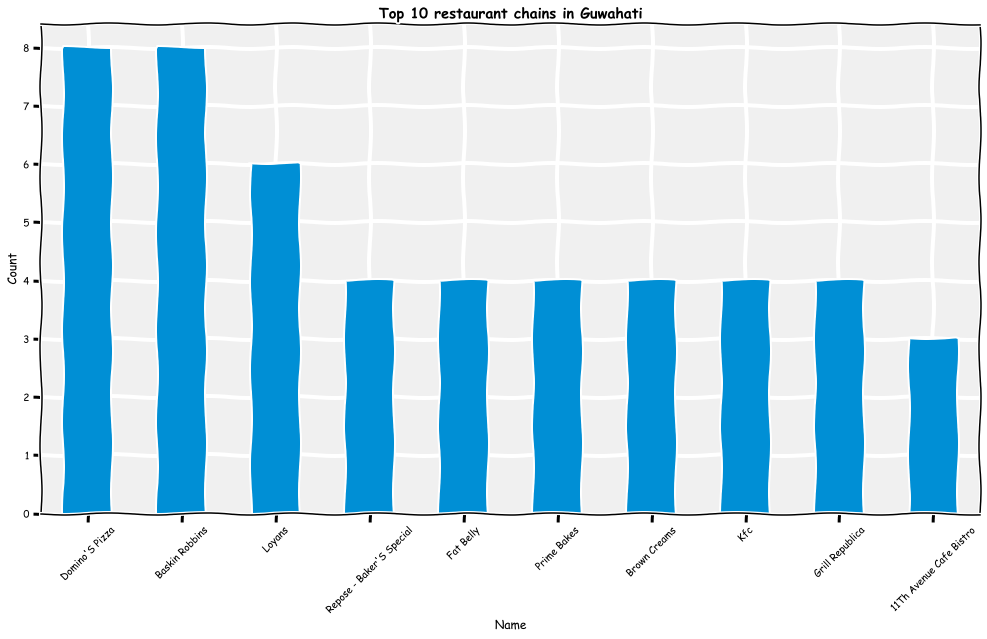

In [97]:
# top reliable chain
plt.rcParams['figure.figsize'] = 15,9
rel_data.name.value_counts()[:10].plot(kind='bar', grid=True)

#rel_data.groupby('name')['aggregate_rating'].count().sort_values(ascending=False)[:10].plot('bar');

plt.title('Top 10 restaurant chains in Guwahati',weight='bold');
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [98]:
rel_data.head()

,name,rest_type,city,locality,latitude,longitude,cuisines,timings,average_cost,aggregate_rating,rating_text,votes,photo_count,cost_range,rate_range
70532,Raja Mircha,Quick Bites,Guwahati,Dispur,26.138824,91.794985,"Assamese, Naga","10 AM to 10:30 PM (Mon, Tue, Wed, Thu, Fri, Su...",400,4.8,Excellent,779,139,cheap,exceptional
70524,Brewbakes,Café,Guwahati,Six Mile,26.133068,91.806473,"Cafe, Continental, Chinese",11AM to 10PM (Mon-Sun),500,4.7,Excellent,741,1804,cheap,exceptional
70519,John'S Kitchen,Quick Bites,Guwahati,Christian Basti,26.159681,91.773681,"Chinese, Seafood",1:30 PM to 10 PM (Mon-Sun),350,4.6,Excellent,966,184,cheap,exceptional
70547,Fat Belly,Quick Bites,Guwahati,Uzan Bazaar,26.185720,91.752103,"Asian, Chinese, Tibetan, Momos",11 AM to 11 PM (Mon-Sun),500,4.6,Excellent,844,1204,cheap,exceptional
70828,Maa Manasha Hotel,Casual Dining,Guwahati,Maligaon,0.000000,0.000000,Bengali,9 AM to 10 PM (Mon-Sun),500,4.5,Excellent,407,29,cheap,exceptional


Counting the types of cuisines

In [99]:
clear_text_2pd('cuisines').value_counts()

North Indian      253
Chinese           246
Fast Food         156
Desserts           80
Bakery             73
Continental        71
Cafe               55
Momos              52
Mithai             52
Beverages          47
South Indian       43
Assamese           39
Street Food        33
Finger Food        32
Biryani            31
Italian            29
Ice Cream          27
Rolls              26
Pizza              24
Sandwich           22
Asian              19
Mughlai            15
Juices             13
Burger             13
North Eastern      13
Thai               12
Naga               11
Bengali            10
Healthy Food        8
Indian              8
Tibetan             8
Salad               7
Mishti              6
Mediterranean       5
Japanese            5
Tea                 5
Seafood             4
American            4
European            4
Mexican             4
Bangladeshi         2
Arabian             2
Lebanese            2
Mongolian           2
BBQ                 2
French    

### Best restaurants as **Cafe** in Guwahati

In [100]:
ex = df[df['cuisines'].str.contains('Cafe')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]                                                                             

,name,aggregate_rating,votes,cuisines,average_cost,locality
70523,Mocha,4.9,1148,"Cafe, Italian",800,"Anil Plaza, Christian Basti"
70524,Brewbakes,4.7,741,"Cafe, Continental, Chinese",500,Six Mile
70572,Nanz Cafe,4.4,286,"Cafe, Momos",800,Zoo Tiniali
70531,The Steaming Mug,4.3,594,Cafe,800,Uzan Bazaar
70610,Loyans Cafe And Restaurant,4.3,310,"Cafe, Italian",800,Zoo Tiniali


### Best restaurants for **Momos** in Guwahati

In [101]:
ex = df[df['cuisines'].str.contains('Momos')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]

                                                                                       

,name,aggregate_rating,votes,cuisines,average_cost,locality
70547,Fat Belly,4.6,844,"Asian, Chinese, Tibetan, Momos",500,Uzan Bazaar
70561,Fat Belly,4.4,389,"Chinese, Thai, Momos",500,Chandmari
70582,Fat Belly,4.4,292,"Asian, Chinese, Tibetan, Momos",500,Uzan Bazaar
70572,Nanz Cafe,4.4,286,"Cafe, Momos",800,Zoo Tiniali
70526,The Woking Mama,4.3,774,"Chinese, Thai, Japanese, Asian, Momos",1300,Christian Basti


### Best restaurants for **Biryani** in Guwahati

In [102]:
ex = df[df['cuisines'].str.contains('Biryani')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]

,name,aggregate_rating,votes,cuisines,average_cost,locality
70528,Kalita Spectrum,4.6,486,"Chinese, Biryani, Desserts",1200,Six Mile
70530,Mast Biryani,4.5,964,"North Indian, Biryani",550,Zoo Tiniali
70562,Culina The Kitchen,4.4,215,"Biryani, Chinese, Mongolian",1200,Ulubari
70875,Nagameez,4.2,230,"Chinese, Naga, Biryani, Tibetan, Momos",600,Silpukhuri
70527,The Corner Cafe,4.1,739,"Cafe, Continental, North Indian, Italian, Chin...",900,Uzan Bazaar


### Best restaurants for **Pizza** in Guwahati

In [103]:
ex = df[df['cuisines'].str.contains('Pizza')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]


,name,aggregate_rating,votes,cuisines,average_cost,locality
70521,Piazza,4.4,489,"Italian, Continental, Asian, Modern Indian, Pizza",800,Ulubari
70588,Green Pepper'S,4.3,302,"Fast Food, Chinese, Pizza",800,Beltola
70882,Soul Craft Cafe,4.2,85,"Fast Food, Chinese, Continental, Burger, Sandw...",250,Uzan Bazaar
70599,Pizzaz,4.1,325,"Pizza, Cafe",600,Zoo Tiniali
70566,Pizza Hut,4.0,474,"Pizza, Fast Food, Italian",700,"Dona Planet Mall, Christian Basti"


### Best restaurants for **Assamese** in Guwahati

In [104]:
ex = df[df['cuisines'].str.contains('Assamese')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]
                                                                                       

,name,aggregate_rating,votes,cuisines,average_cost,locality
70532,Raja Mircha,4.8,779,"Assamese, Naga",400,Dispur
70830,Michinga,4.5,154,"Assamese, Chinese, Naga, Beverages",750,Uzan Bazaar
70608,Gam'S Delicacy Restaurant,4.3,327,Assamese,800,Ganeshguri
70543,Khorikaa Restaurant,4.2,674,Assamese,500,Ulubari
70883,Oryza - The Ethnic Kitchen,4.2,48,"North Eastern, Assamese",700,Maligaon


### Best restaurants for **South Tndian** in Guwahati

In [105]:
ex = df[df['cuisines'].str.contains('South Indian')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]                                                                                   

,name,aggregate_rating,votes,cuisines,average_cost,locality
70559,Chennai Kitchen,4.3,390,South Indian,200,Christian Basti
70876,Khushboo,4.2,259,"Beverages, Chinese, South Indian, Ice Cream",450,Fancy Bazaar
70577,Jb'S,4.1,209,"South Indian, Fast Food, North Indian",500,Ganeshguri
70905,Sagar Ratna,4.1,202,"South Indian, North Indian, Chinese",500,Paltan Bazaar
70903,Kiranshree Sweets,4.1,194,"South Indian, North Indian, Chinese, Mithai",500,Christian Basti


### Best restaurants for **North Indian** in Guwahati

In [106]:
ex = df[df['cuisines'].str.contains('North Indian')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]                                                                                       

,name,aggregate_rating,votes,cuisines,average_cost,locality
70520,Barbeque Nation,4.9,1914,"North Indian, Mediterranean",1600,Ulubari
70530,Mast Biryani,4.5,964,"North Indian, Biryani",550,Zoo Tiniali
70529,Mughal Garden,4.5,627,"Mughlai, North Indian",600,Ulubari
70535,Rang De Basanti Urban Dhaba,4.4,548,North Indian,1000,Christian Basti
70534,Street Za,4.3,557,"North Indian, Fast Food, Chinese",300,Hatigaon


### Best restaurants for **Chinese** in Guwahati

In [107]:
ex = df[df['cuisines'].str.contains('Chinese')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]                                                                                      

,name,aggregate_rating,votes,cuisines,average_cost,locality
70524,Brewbakes,4.7,741,"Cafe, Continental, Chinese",500,Six Mile
70519,John'S Kitchen,4.6,966,"Chinese, Seafood",350,Christian Basti
70547,Fat Belly,4.6,844,"Asian, Chinese, Tibetan, Momos",500,Uzan Bazaar
70528,Kalita Spectrum,4.6,486,"Chinese, Biryani, Desserts",1200,Six Mile
70829,Ziya,4.5,313,"Continental, Chinese",700,Silpukhuri


### Best restaurants for **Bakery** in Guwahti

In [108]:
ex = df[df['cuisines'].str.contains('Bakery')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]                                                                                      

,name,aggregate_rating,votes,cuisines,average_cost,locality
70838,Loyans,4.4,343,"Bakery, Fast Food",200,Uzan Bazaar
70839,The Belgian Waffle Co.,4.4,109,"Bakery, Desserts, Beverages",300,Zoo Tiniali
70550,Kalita Cafe,4.3,340,"Rolls, Bakery, European",1200,Six Mile
70721,Eggsotic Pastry Shop,4.2,142,Bakery,100,Uzan Bazaar
70614,Patisserie Operaa,4.1,347,"Bakery, Fast Food",350,Ulubari


### Best  restaurants for **Tea** in Guwahati

In [109]:
ex = df[df['cuisines'].str.contains('Tea')]
ex_data = ex.query('aggregate_rating >=@avg_rate').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
ex_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']].drop_duplicates()[:5]                                                                                    

,name,aggregate_rating,votes,cuisines,average_cost,locality
71179,Chai Time,3.8,88,"Fast Food, Sandwich, Tea",200,Zoo Tiniali
70722,Kesaria Chaiwala,3.8,61,"Tea, Fast Food",100,Chandmari
71472,The Golden Shrub,3.7,42,"Cafe, Tea",500,Christian Basti
70725,Chai Biskut,3.6,17,"Fast Food, Tea",100,Pan Bazaar


# Word Analysis

In [110]:
!pip install vaderSentiment
!pip install wordcloud

In [111]:
from tqdm import tqdm
import re
from nltk.corpus import stopwords 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Some of the most famous restaurants in Guwahati

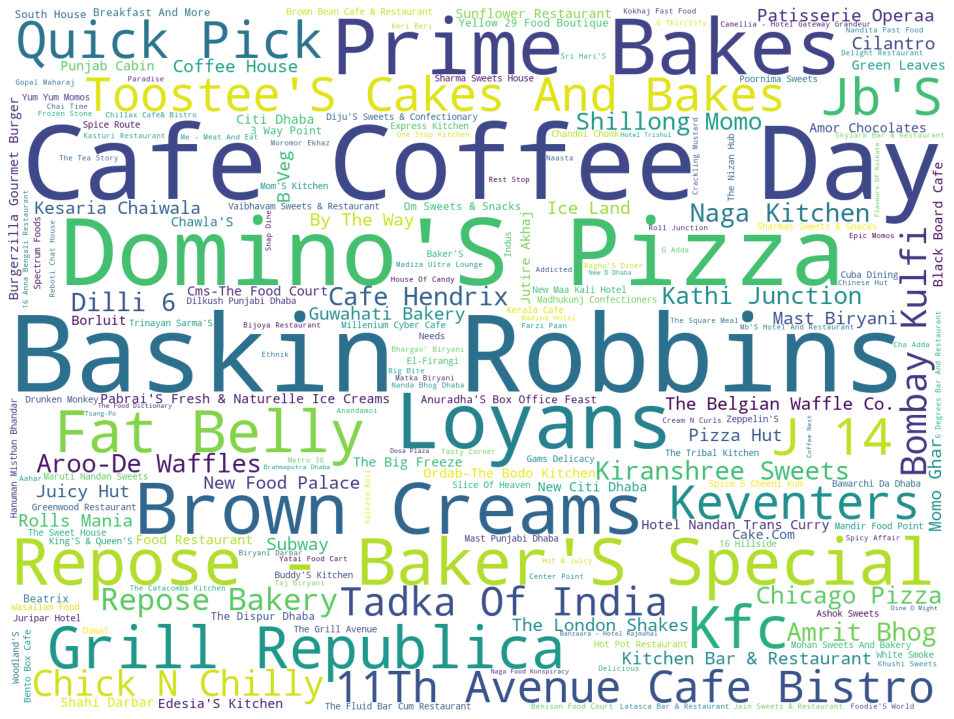

In [112]:

from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, background_color ='white',stopwords = stopwords).generate_from_frequencies(df.name.value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off');

## Word Cloud of cuisines available in various resturant

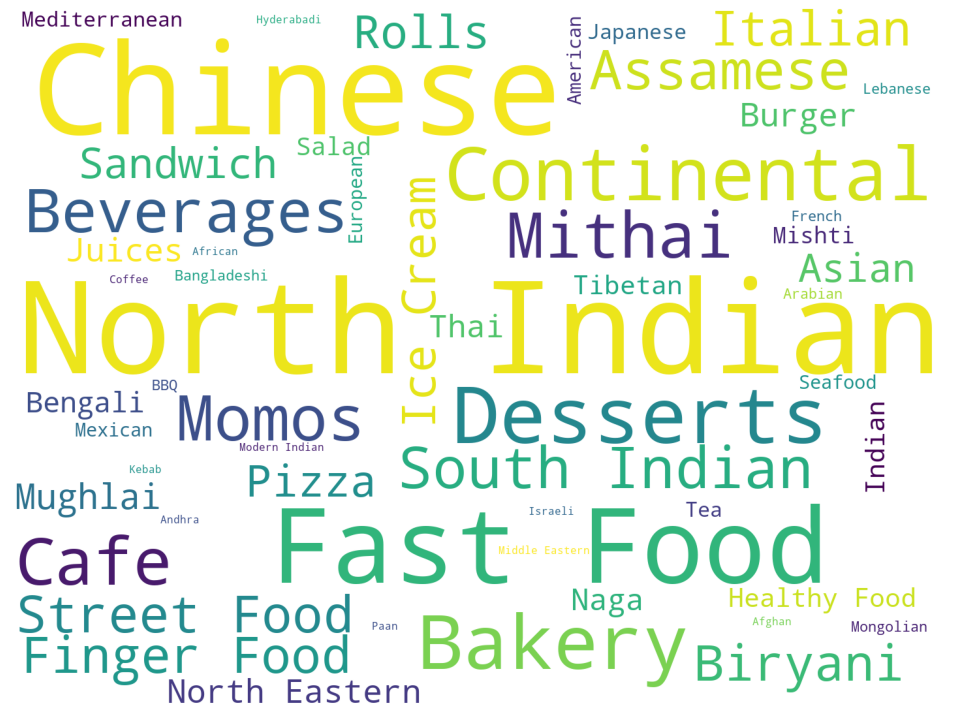

In [113]:

from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, background_color ='white',stopwords = stopwords).generate_from_frequencies(clear_text_2pd('cuisines').value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off');

In [114]:
!pip install nltk
!pip install folium


In [115]:
from wordcloud import WordCloud
from folium.plugins import HeatMap
import folium
from tqdm import tqdm
import re
from nltk.corpus import stopwords 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## HeatMaps

In [116]:
def generateBaseMap(default_location=[26.17743020173336, 91.75936228855836], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

### Heatmap for density of restaurants in Guwahati

In [117]:
#lat=np.array(data['latitude'].unique())
#lon=np.array(data['longitude'].unique())
lat={}
lon={}

Rest_locations=pd.DataFrame({'locality':df.locality.value_counts().index,'count':df.locality.value_counts()})

for index, row in df.iterrows():
    if row['locality'] in Rest_locations['locality'].to_list():
        lat[row['locality']]= row['latitude']
        lon[row['locality']]= row['longitude']

Rest_locations['latitude']= pd.DataFrame.from_dict(lat, orient='index')
Rest_locations['longitude']= pd.DataFrame.from_dict(lon, orient='index')

Rest_locations= Rest_locations.reset_index()
Rest_locations= Rest_locations.drop(columns='index')

basemap=generateBaseMap()
HeatMap(Rest_locations[['latitude','longitude','count']].values.tolist(),zoom=20,radius=16).add_to(basemap)

In [118]:
Rest_locations

,locality,count,latitude,longitude
0,Zoo Tiniali,68,26.143409,91.810917
1,Uzan Bazaar,47,26.185663,91.752321
2,Christian Basti,45,26.162730,91.772811
3,Beltola,45,26.129604,91.796249
4,Ulubari,40,26.166275,91.766999
5,Bhangagarh,40,26.175758,91.772903
6,Chandmari,38,26.181861,91.771840
7,Six Mile,37,26.125547,91.805690
8,Paltan Bazaar,33,26.178326,91.751600
9,Ganeshguri,32,26.154600,91.784490


In [119]:
basemap